### Analyse results for large online networks

In [1]:
from lib import *
import pandas as pd
import seaborn as sns

In [6]:
all_online_networks = pd.read_csv(DATA_DIR_PATH / "online_social_networks.csv")
all_online_networks.head(2)

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,douban,douban,154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,NaN,NaN,3460300,large
1,ego_social,facebook_0,333,2519,15.13,15.51,35.79,172.26,0.24,0.43,11,0.97,Undirected,Unipartite,name feat circles,NaN,22528,small


In [7]:
df = pd.read_csv("results/result_small_online.csv")
df = df.merge(all_online_networks, on="name") # merge with properties from netzschleuder

In [8]:
pd.DataFrame(df.mean()).style.format("{:.2f}")

/var/folders/p9/02724x0n07j48t5y71my51980000gn/T/ipykernel_16902/2987761780.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df.mean()).style.format("{:.2f}")


,0
Unnamed: 0,28.00
_,0.00
idx,1.00
dataset,nan
n_nodes,290.11
frac_total,0.99
density,0.16
dbar,35.14
dcv,0.96
dmax,176.19


In [9]:
pd.DataFrame(df.std()).style.format("{:.2f}")

/var/folders/p9/02724x0n07j48t5y71my51980000gn/T/ipykernel_16902/3197110483.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df.std()).style.format("{:.2f}")


,0
Unnamed: 0,16.60
_,0.00
idx,0.00
dataset,nan
n_nodes,187.53
frac_total,0.05
density,0.11
dbar,28.30
dcv,0.45
dmax,136.43


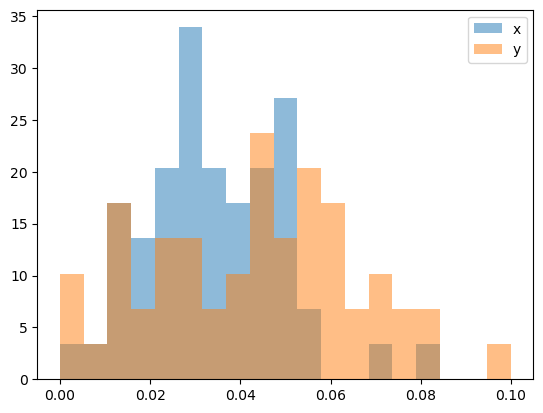

In [11]:
x = df["data_comp"].to_numpy()
y = df["null_100_comp"].to_numpy()

bins = np.linspace(0,0.1, 20)
plt.hist(x, bins, alpha=0.5, label='x', density=True)
plt.hist(y, bins, alpha=0.5, label='y', density=True)
plt.legend(loc='upper right')
plt.show()

In [12]:
df.columns

Index(['Unnamed: 0', '_', 'idx', 'dataset', 'name', 'n_nodes', 'frac_total',
       'density', 'dbar', 'dcv', 'dmax', 'null_100_sim_g', 'null_100_sim',
       'null_100_sim_e', 'null_100_comp_g', 'null_100_comp', 'null_100_comp_e',
       'data_sim_g', 'data_sim', 'data_sim_e', 'data_comp_g', 'data_comp',
       'data_comp_e', 'group', 'nodes', 'edges', 'avg_degree',
       'std_dev_degree', 'largest_eigenvalue_hashimoto',
       'random_walk_mixing_time', 'degree_assortativity', 'global_clustering',
       'diameter', 'relative_size_of_largest_component', 'kind', 'mode',
       'node_properties', 'edge_properties', 'gml_file_size', 'nodes_qcut'],
      dtype='object')

In [13]:
len(df.index)

57

In [14]:
df.head(3)

,Unnamed: 0,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,0,0,1,NaN,S2,165,1.00000,0.053659,8.800000,0.946063,...,-0.07,0.33,6,1.00,Undirected,Unipartite,name,NaN,6144,small
1,1,0,1,NaN,S1,320,1.00000,0.046415,14.806250,0.963127,...,-0.02,0.29,7,1.00,Undirected,Unipartite,name,NaN,14336,small
2,2,0,1,NaN,facebook_friends,329,0.90884,0.036215,11.878419,0.921316,...,0.10,0.51,9,0.91,Undirected,Unipartite,context_0 context_1 context_2 context_3,name,17408,small


Visualise Correlation matrix


In [15]:
def plot_correlation_matrix(df, title):
    plt.figure(figsize=(8, 8))
    plt.title(title)
    mask = np.triu(np.ones_like(df, dtype=bool))
    sns.heatmap(df, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.show()

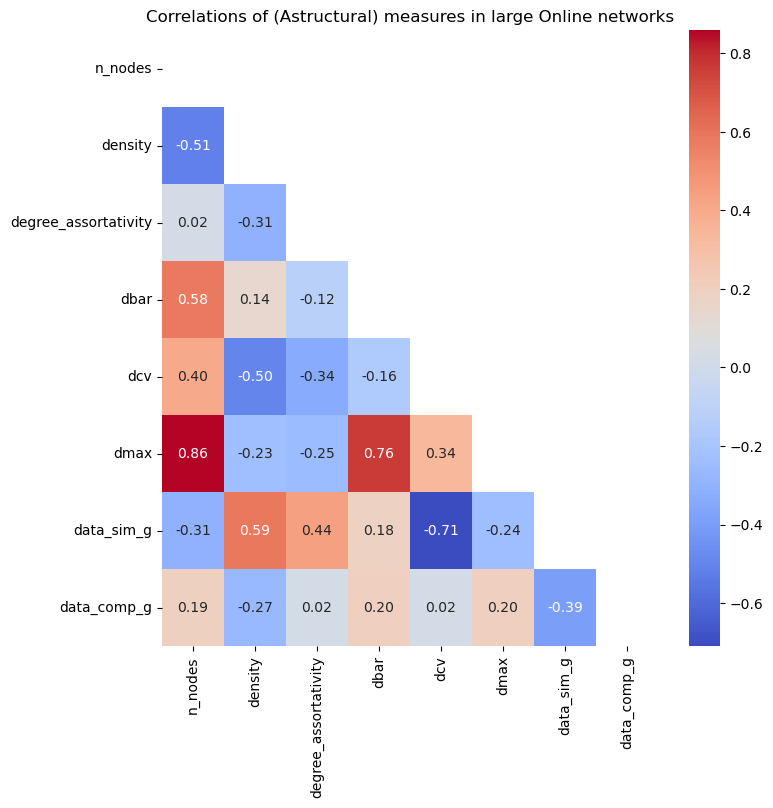

In [16]:
plot_correlation_matrix(df[["n_nodes", "density", "degree_assortativity", "dbar", "dcv", "dmax", "data_sim_g", "data_comp_g"]].corr(), "Correlations of (Astructural) measures in large Online networks")

In [17]:
df.columns

Index(['Unnamed: 0', '_', 'idx', 'dataset', 'name', 'n_nodes', 'frac_total',
       'density', 'dbar', 'dcv', 'dmax', 'null_100_sim_g', 'null_100_sim',
       'null_100_sim_e', 'null_100_comp_g', 'null_100_comp', 'null_100_comp_e',
       'data_sim_g', 'data_sim', 'data_sim_e', 'data_comp_g', 'data_comp',
       'data_comp_e', 'group', 'nodes', 'edges', 'avg_degree',
       'std_dev_degree', 'largest_eigenvalue_hashimoto',
       'random_walk_mixing_time', 'degree_assortativity', 'global_clustering',
       'diameter', 'relative_size_of_largest_component', 'kind', 'mode',
       'node_properties', 'edge_properties', 'gml_file_size', 'nodes_qcut'],
      dtype='object')

### Finding: degree assortativity is correlated with global complementarity in large networks

Text(0.5, 1.0, 'Global complementarity of small online networks, data vs. null model')

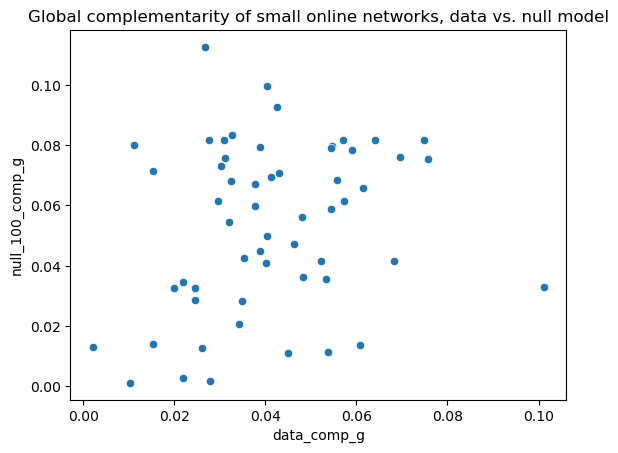

In [20]:
sns.scatterplot(data=df, x="data_comp_g", y="null_100_comp_g")
plt.title("Global complementarity of small online networks, data vs. null model")

Text(0.5, 1.0, 'Global complementarity of small online networks, data vs. null model')

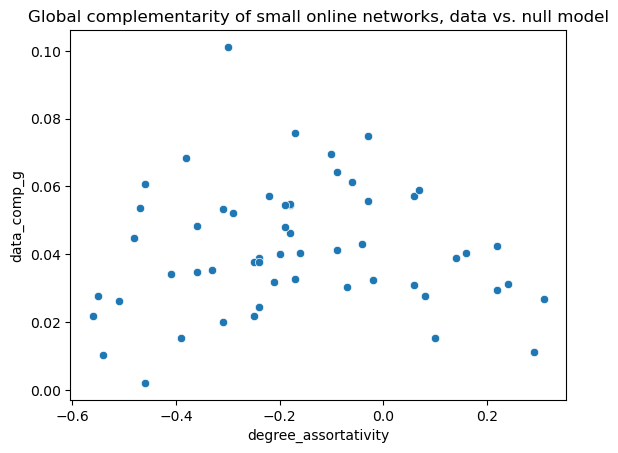

In [21]:
sns.scatterplot(data=df, x="degree_assortativity", y="data_comp_g")
plt.title("Global complementarity of small online networks, data vs. null model")

Text(0.5, 1.0, 'Similarity vs. complementarity of small online networks, data')

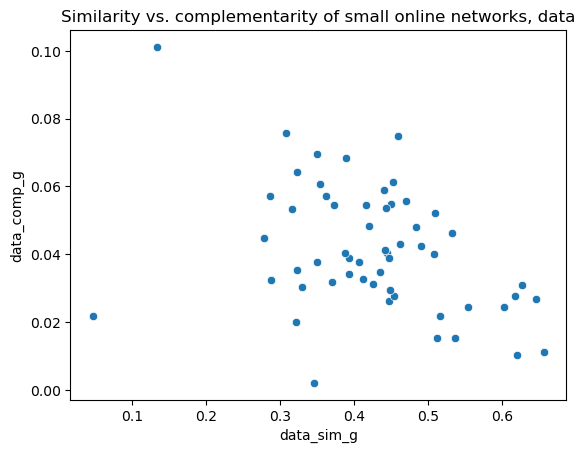

In [22]:
sns.scatterplot(data=df, x="data_sim_g", y="data_comp_g")
plt.title("Similarity vs. complementarity of small online networks, data")

In [23]:
df.columns

Index(['Unnamed: 0', '_', 'idx', 'dataset', 'name', 'n_nodes', 'frac_total',
       'density', 'dbar', 'dcv', 'dmax', 'null_100_sim_g', 'null_100_sim',
       'null_100_sim_e', 'null_100_comp_g', 'null_100_comp', 'null_100_comp_e',
       'data_sim_g', 'data_sim', 'data_sim_e', 'data_comp_g', 'data_comp',
       'data_comp_e', 'group', 'nodes', 'edges', 'avg_degree',
       'std_dev_degree', 'largest_eigenvalue_hashimoto',
       'random_walk_mixing_time', 'degree_assortativity', 'global_clustering',
       'diameter', 'relative_size_of_largest_component', 'kind', 'mode',
       'node_properties', 'edge_properties', 'gml_file_size', 'nodes_qcut'],
      dtype='object')

Text(0.5, 1.0, 'Global complementarity of small online networks, data vs. null model')

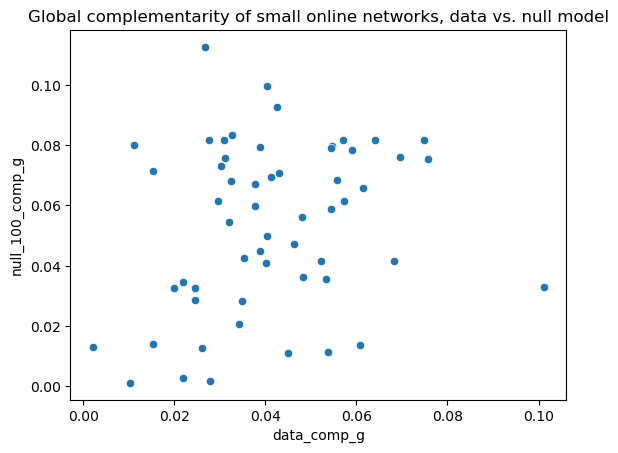

In [24]:
sns.scatterplot(data=df, x="data_comp_g", y="null_100_comp_g")
plt.title("Global complementarity of small online networks, data vs. null model")

/Users/keisuke/opt/anaconda3/envs/Network_Science/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Global complementarity and global similarity of small online networks')

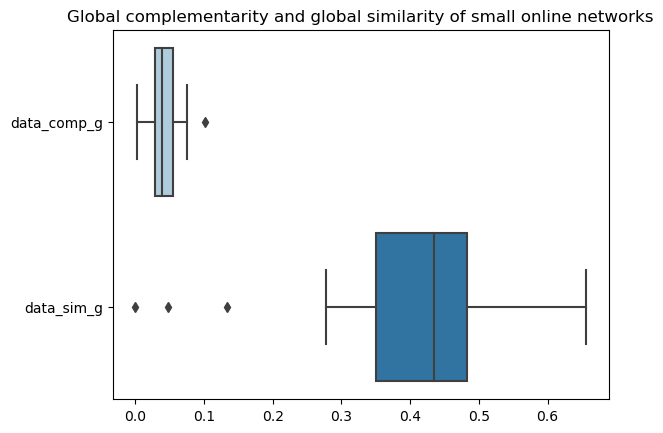

In [25]:

sns.boxplot(data=df[["data_comp_g", "data_sim_g"]], orient="h", palette="Paired")
plt.title("Global complementarity and global similarity of small online networks")

/Users/keisuke/opt/anaconda3/envs/Network_Science/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Global complementarity and global similarity of small online networks')

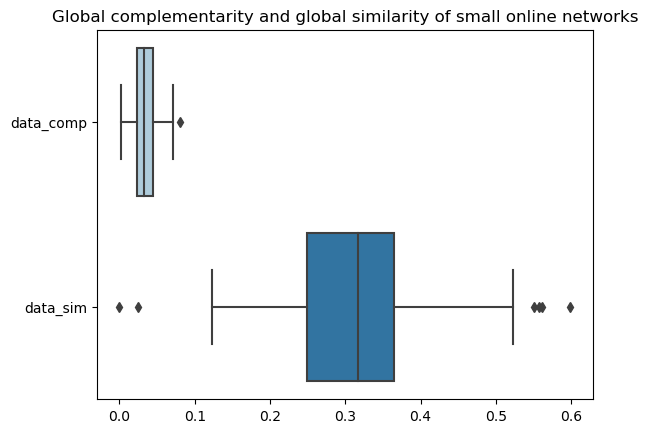

In [26]:
sns.boxplot(data=df[["data_comp", "data_sim"]], orient="h", palette="Paired")
plt.title("Global complementarity and global similarity of small online networks")

/Users/keisuke/opt/anaconda3/envs/Network_Science/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Global complementarity and global similarity of small online networks')

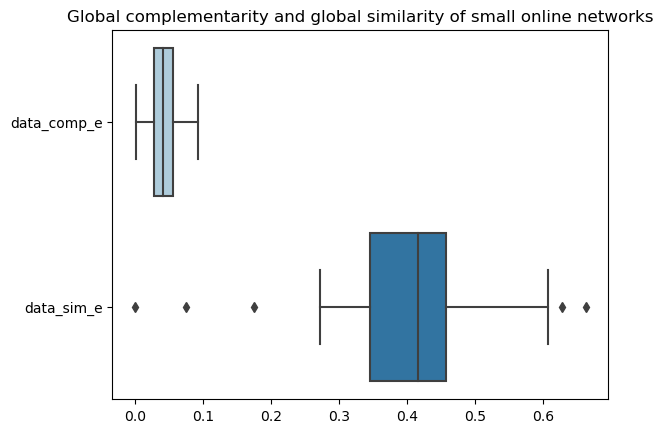

In [27]:
sns.boxplot(data=df[["data_comp_e", "data_sim_e"]], orient="h", palette="Paired")
plt.title("Global complementarity and global similarity of small online networks")

In [28]:
df[df["data_sim_g"] < 0.1]

,Unnamed: 0,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
31,31,0,1,NaN,gplus_104076158580173410325,8,1.0,0.250000,1.75000,1.133893,...,-1.00,0.00,2,1.0,Undirected,Bipartite,name feat circles,NaN,902,small
43,43,0,1,NaN,gplus_110581012109008817546,627,1.0,0.010563,6.61244,3.801860,...,-0.56,0.05,4,1.0,Undirected,Unipartite,name feat circles,NaN,26624,small


In [29]:
df[df["data_sim_g"] > 0.35]

,Unnamed: 0,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
2,2,0,1,NaN,facebook_friends,329,0.908840,0.036215,11.878419,0.921316,...,0.10,0.51,9,0.91,Undirected,Unipartite,context_0 context_1 context_2 context_3,name,17408,small
3,3,0,1,NaN,gplus_114054672576929802335,175,1.000000,0.271790,47.291429,0.802294,...,-0.39,0.54,5,1.00,Undirected,Unipartite,name feat circles,NaN,20480,small
4,4,0,1,NaN,gplus_116899029375914044550,22,1.000000,0.467532,9.818182,0.578315,...,-0.54,0.62,3,1.00,Undirected,Unipartite,name feat circles,NaN,1024,small
5,5,0,1,NaN,facebook_3980,44,0.846154,0.145877,6.272727,0.662875,...,0.16,0.45,5,0.85,Undirected,Unipartite,name feat circles,NaN,3072,small
7,7,0,1,NaN,facebook_348,224,1.000000,0.127803,28.500000,0.784823,...,0.22,0.49,9,1.00,Undirected,Unipartite,name feat circles,NaN,19456,small
9,9,0,1,NaN,gplus_110241952466097562819,83,1.000000,0.197179,16.168675,0.957174,...,-0.51,0.45,4,1.00,Undirected,Unipartite,name feat circles,NaN,5120,small
10,10,0,1,NaN,gplus_113597493946570654755,321,1.000000,0.144100,46.112150,0.878640,...,-0.06,0.45,5,1.00,Undirected,Unipartite,name feat circles,NaN,36864,small
11,11,0,1,NaN,gplus_101541879642294398860,486,0.995902,0.128658,62.399177,0.988380,...,-0.24,0.39,5,1.00,Undirected,Unipartite,name feat circles,NaN,70656,small
14,14,0,1,NaN,gplus_107965826228461029730,495,1.000000,0.137038,67.696970,0.895123,...,-0.24,0.41,4,1.00,Undirected,Unipartite,name feat circles,NaN,76800,small
15,15,0,1,NaN,facebook_414,148,0.986667,0.155543,22.864865,0.564535,...,0.31,0.65,7,0.99,Undirected,Unipartite,name feat circles,NaN,11264,small


In [30]:
df[df["data_sim_g"] < df["data_comp_g"]] # only in the bipartite networks the complementarity was higher

,Unnamed: 0,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut


/Users/keisuke/opt/anaconda3/envs/Network_Science/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Global complementarity and global similarity of small online networks, null models')

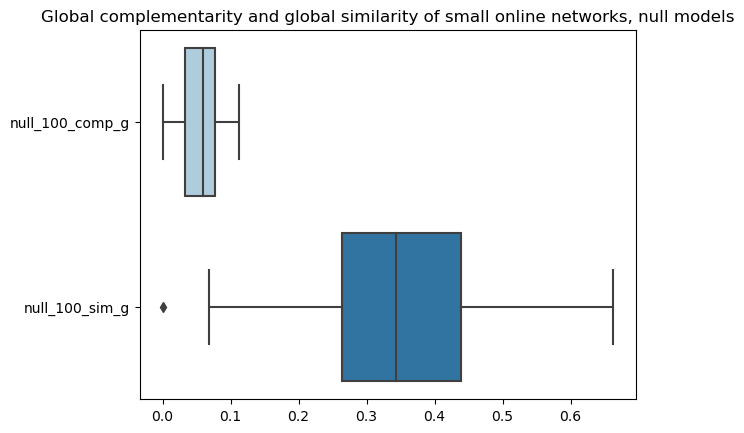

In [33]:
sns.boxplot(data=df[["null_100_comp_g", "null_100_sim_g"]], orient="h", palette="Paired")
plt.title("Global complementarity and global similarity of small online networks, null models")

In [34]:
df.columns

Index(['Unnamed: 0', '_', 'idx', 'dataset', 'name', 'n_nodes', 'frac_total',
       'density', 'dbar', 'dcv', 'dmax', 'null_100_sim_g', 'null_100_sim',
       'null_100_sim_e', 'null_100_comp_g', 'null_100_comp', 'null_100_comp_e',
       'data_sim_g', 'data_sim', 'data_sim_e', 'data_comp_g', 'data_comp',
       'data_comp_e', 'group', 'nodes', 'edges', 'avg_degree',
       'std_dev_degree', 'largest_eigenvalue_hashimoto',
       'random_walk_mixing_time', 'degree_assortativity', 'global_clustering',
       'diameter', 'relative_size_of_largest_component', 'kind', 'mode',
       'node_properties', 'edge_properties', 'gml_file_size', 'nodes_qcut'],
      dtype='object')

Text(0, 0.5, 'Density')

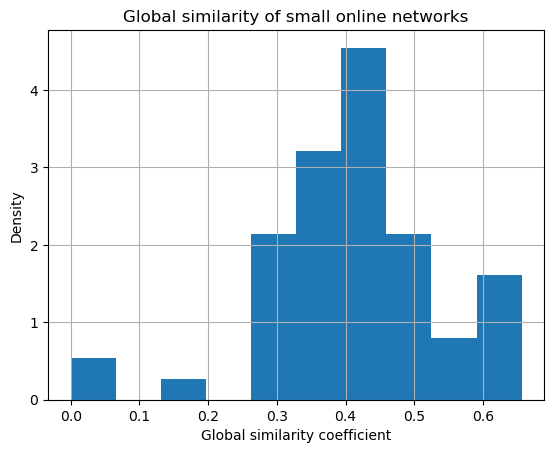

In [35]:
df["data_sim_g"].hist(density=True, bins=10)
plt.title("Global similarity of small online networks")
plt.xlabel("Global similarity coefficient")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

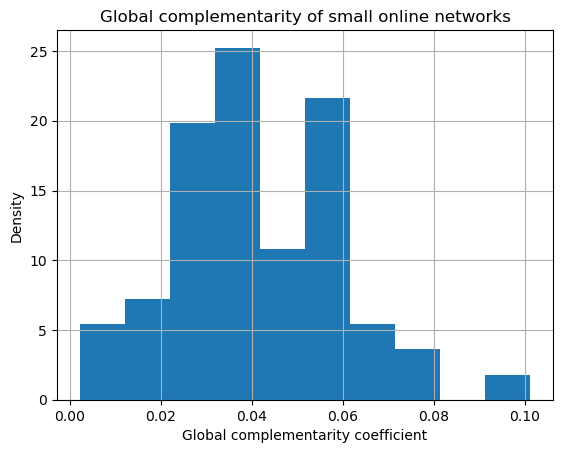

In [36]:
df["data_comp_g"].hist(density=True, bins=10)
plt.title("Global complementarity of small online networks")
plt.xlabel("Global complementarity coefficient")
plt.ylabel("Density")